# Notas de estudo sobre NLP utilizando python 

Natural Language Processing - [NLP](https://medium.com/ensina-ai/introdu%C3%A7%C3%A3o-a-processamento-de-linguagem-natural-174936c096b#:~:text=%C3%89%20o%20processo%20de%20gerar,a%20partir%20de%20um%20v%C3%ADdeo.) (processamento natural de linguagens) é um subcampo da linguística, ciência da computação e inteligência artificial. Essa área de pesquisa concentra-se em tornar a linguagem humana natural utilizável por programas de computador.

O objetivo é ser capaz de estabelecer um computador capaz de "entender" o conteúdo textuais, incluindo as nuances contextuais da linguagem dentro deles. A tecnologia pode então extrair com precisão informações e insights contidos nos textos estudados, bem como categorizar e organizar os mesmos.

Muitos dos dados que podemos analisar estão em formato de dados não estruturados e contêm texto legível apenas por humanos. Antes de poder analisar esses dados programaticamente, primeiro precisamos pré-processá-los. Vamos então estudar bem as tarefas de **pré-processamento de texto** que podemos fazer com o NLTK bem como algumas simples **análises textuais** e implementações de diferentes **ferramentas linguísticas** de análise morfológica e sintática; e também criar diferentes **visualizações** para as mesmas.

## Libs

como mencionado na primeira celula, vou conduzir os primeiros estudos utilizando NLTK, e alguns módulos diferentes de Numpy e Matplotlib. Caso algum problema de versão eventualmente aconteça, as funções que pretendo explorar aqui são correspondentes as seguintes versões:

```Shell
$ python -m pip install nltk==3.5

$ python -m pip install numpy matplotlib
```

## Tokenizing 

"Tokenizar", significa dividir convenientemente o texto por palavra ou por frase. Isso permitirá que você trabalhe com textos menores e que ainda são relativamente coerentes e significativos, mesmo fora do contexto do restante do texto. É o primeiro passo para transformar dados não estruturados em dados estruturados, que são mais fáceis de analisar.

Ao analisar o texto, você estará tokenizando por palavra e tokenizando por frase. Aqui está o que ambos os tipos de tokenização trazem para a mesa:

* Tokenização por palavra: as palavras são como os átomos da linguagem natural. Eles são a menor unidade de significado que ainda faz sentido por conta própria. Tokenizar seu texto por palavra permite identificar palavras que aparecem com frequência. Por exemplo, se você estiver analisando um grupo de anúncios de emprego, poderá descobrir que a palavra “Python” aparece com frequência. Isso pode sugerir uma alta demanda por conhecimento em Python, mas você precisaria se aprofundar para saber mais.

* Tokenização por frase: Ao tokenizar por frase, você pode analisar como essas palavras se relacionam e ver mais contexto. Existem muitas palavras negativas em torno da palavra “Python” porque o gerente de contratação não gosta de Python? Existem mais termos do domínio da herpetologia do que do domínio do desenvolvimento de software, sugerindo que você pode estar lidando com um tipo de python totalmente diferente do que esperava?

Veja como importar as partes relevantes do NLTK para que você possa tokenizar por palavra e por frase, e definir uma primeira string para podermos efetuar nossa tarefa como desejada:

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize

example_string = """
 Muad'Dib learned rapidly because his first training was in how to learn.
 And the first lesson of all was the basic trust that he could learn.
 It's shocking to find how many people do not believe they can learn,
 and how many more believe learning to be difficult."""

Vamos agora utilizar a função `sent_tokenize` para splitar nossa string em frases:

In [4]:
sent_tokenize(example_string)

["\n Muad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,\n and how many more believe learning to be difficult."]

Tokenizar a `example_string` por frase nos deu como esperado 3 frases resultantes: 

* "Muad'Dib learned rapidly because his first training was in how to learn."

* 'And the first lesson of all was the basic trust that he could learn.'

* "It's shocking to find how many people do not believe they can learn, and how many more believe learning to be difficult."

Podemos prosseguir agora para tentar tokenizar nossa string por palavras, fazendo

In [5]:
word_tokenize(example_string)

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

obtivemos então uma lista de strings que o NLTK considera como sendo palavras, como por exemplo

* "Muad'Dib"

* 'training'

* 'how'

mas as seguintes strings também foram consideradas palavras: 

* "'s"

* ','

* '.'

Perceba como "It's" foi dividido no apóstrofo para dar a você 'It' e "'s", mas "Muad'Dib" ficou inteiro! Isso acontece porque o NLTK sabe que 'It' e "'s" (uma contração de "is") são duas palavras distintas, então ele as contou separadamente. Mas "Muad'Dib" não é uma contração aceita como "It's", então não foi lida como duas palavras separadas e foi deixada intacta.

## Filtrando Stop Words

As ditas Stop Words são palavras que você deseja ignorar, então você as filtra do seu texto ao processá-lo. Palavras muito comuns como 'in', 'is' e 'an' em ionglês são frequentemente usadas como palavras de parada, pois não adicionam muito significado a um texto em si.

Veja como importar as partes relevantes do NLTK para filtrar palavras de parada:

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#a quote that you can use to filter
quote = "Sir, I protest. I am not a merry man!"

#tokenizing the quote by word as we did before
words_in_quote = word_tokenize(quote)
print(words_in_quote)

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']


O próximo passo é criar um conjunto de palavras de parada para filtrar `words_in_quote`. Para este exemplo especifico que estamos tratando, precisamos especificar as palavras de parada em "inglês":

ps.: Obviamente no nosso caso de trabalho em particular, podemos utilizar o dicionário de stopwords em potuguês (ou até algum dos outros idiomas)

In [9]:
#nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

#list to hold the words that make it past the filter
filtered_list = []

for word in words_in_quote:
    if word.casefold() not in stop_words:
        filtered_list.append(word)
        
filtered_list = [
    word for word in words_in_quote if word.casefold() not in stop_words
]

print(filtered_list)

['Sir', ',', 'protest', '.', 'merry', 'man', '!']


Você filtrou algumas palavras como 'am' e 'a', mas também filtrou 'not', o que afeta o significado geral da frase. 

Palavras como 'I' e 'not' podem parecer importantes demais para serem filtradas e, dependendo do tipo de análise que você deseja fazer, elas podem ser. Aqui está o porquê:

* 'I' é um pronome, que são palavras de contexto em vez de palavras de conteúdo:

  - As **palavras de conteúdo** fornecem informações sobre os tópicos abordados no texto ou o sentimento que o autor tem sobre esses tópicos.

  - As **palavras de contexto** fornecem informações sobre o estilo de escrita. Você pode observar padrões em como os autores usam palavras de contexto para quantificar seu estilo de escrita. Depois de quantificar seu estilo de escrita, você pode analisar um texto escrito por um autor desconhecido para ver o quanto ele segue um estilo de escrita específico para tentar identificar quem é o autor.

* 'not' é tecnicamente um advérbio, mas ainda foi incluído na lista de palavras de parada do NLTK para inglês. Se você deseja editar a lista de palavras de parada para excluir 'not' ou fazer outras alterações, você pode [baixá-lo](https://www.nltk.org/nltk_data/).

Então, 'I' e 'not' podem ser partes importantes de uma frase, mas depende do que você está tentando aprender com essa frase

## Stemming 

 **Stemming** é uma tarefa de processamento de texto na qual você reduz as palavras à sua *raiz*, que é a parte central de uma palavra. Por exemplo, as palavras “ajudando” e “ajudante” compartilham a raiz “ajuda”. Técnicas de Stemming permitem que você se concentre no significado básico de uma palavra, em vez de todos os detalhes de como ela está sendo usada. O NLTK tem mais de um "stemmatizador", e aqui utilizaremos especificamente o lematizador [Porter](https://www.nltk.org/_modules/nltk/stem/porter.html). 
 
 Vamos prosseguir importando os módulos necessários, definindo uma string e procedendo com sua stemmização de forma que: 


In [10]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 

stemmer = PorterStemmer() 

string_for_stemming = """"
The crew of the USS Discovery discovered many discoveries.
Discovering is what explorers do."""

#as you can only stem words, we have to tokenize our text like before
words = word_tokenize(string_for_stemming)
print("Our original list of words is: ", words)


stemmed_words = [stemmer.stem(word) for word in words]
print("The new list, of stemmed words is: ", stemmed_words)

Our original list of words is:  ['``', 'The', 'crew', 'of', 'the', 'USS', 'Discovery', 'discovered', 'many', 'discoveries', '.', 'Discovering', 'is', 'what', 'explorers', 'do', '.']
The new list, of stemmed words is:  ['``', 'the', 'crew', 'of', 'the', 'uss', 'discoveri', 'discov', 'mani', 'discoveri', '.', 'discov', 'is', 'what', 'explor', 'do', '.']


Here’s what happened to all the words that started with 'discov' or 'Discov':

| Palavra Original      | Versão Stemmizada |
| ----------- | ----------- |
| 'Discovery'      | 'discoveri'       |
| 'discovered'   | 'discov'       |
| 'discoveries'      | 'discoveri'       |
| 'Discovering'   | 'discov'       |


Esses resultados parecem um pouco inconsistentes. Por que 'Discovery' lhe daria 'discoveri' quando 'Discovering' lhe daria 'descov'?

**Understemming** e **overstemming** são duas maneiras pelas quais o stemming pode dar errado:

* 1. **Understemming** acontece quando duas palavras relacionadas devem ser reduzidas ao mesmo radical, mas não são. Este é um falso negativo.

* 2. **Overstemming** acontece quando duas palavras não relacionadas são reduzidas ao mesmo radical, mesmo que não devessem ser. Este é um falso positivo.

O que acontece é que o algoritmo de derivação de Porter data de 1979, então é um pouco mais antigo. O stemmatizador **Snowball**, que também é chamado de *Porter2*, é uma melhoria do original e também está disponível através do NLTK, para que você possa usá-lo em seus próprios projetos. Também vale a pena notar que o objetivo do stemmatizador de Porter não é produzir palavras completas, mas encontrar formas variantes de uma palavra.

Felizmente, também existem outras maneiras de reduzir as palavras ao seu significado principal, como **lematizar**, que ainda vamos estudar mais a frente no curso. Mas primeiro, precisamos cobrir partes do discurso.

## Marcando partes do discurso (Tagging Parts of Speech)


"Parte do discurso" é um termo gramatical que lida com os papéis que as palavras desempenham quando você as usa juntas em frases. Marcar partes do discurso, ou **POS tagging**, é a tarefa de rotular as palavras em seu texto de acordo com sua parte do discurso.

Em inglês, existem oito partes do discurso:

| Parte do discurso  | Papel | exemplos |
| ----------- | ----------- | ----------- |            
| Noun    | Is a person, place, or thing   |    mountain, bagel, Poland        |
| Pronoun  | Replaces a noun     |       you, she, we       | 
| Adjective      | Gives information about what a noun is like   |      efficient, windy, colorful      |
| Verb   | Is an action or a state of being     |       learn, is, go      |
| Adverb    | Gives information about how a noun or pronoun is connected to another adverb   |      efficiently, always, very      |
| Preposition  | Gives information about how a noun or pronoun is connected to another word     |       from, about, at       | 
| Conjunction      | Connects two other words or phrases  |      so, because, and      |
| Interjection   | Is an exclamation    |       yay, ow, wow      |


Algumas fontes também incluem a categoria artigos (como “a” ou “o”) na lista de partes do discurso, mas outras fontes os consideram como adjetivos. O NLTK usa a palavra determinante para se referir a artigos.

Veja como importar as partes relevantes do NLTK para marcar partes do discurso:

In [13]:
#nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

sagan_quote = """
If you wish to make an apple pie from scratch,
you must first invent the universe."""

words_in_sagan_quote = word_tokenize(sagan_quote)

import nltk
nltk.pos_tag(words_in_sagan_quote)

[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

All the words in the quote are now in a separate [tuple](https://realpython.com/python-lists-tuples/), with a tag that represents their part of speech. But what do the tags mean? To get a list of tags and their meanings:

In [15]:
#lista beem longa, recomendo rodar uma vez apenas por questão de curiosidade
nltk.download('tagsets')

nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\ruben.araujo\AppData\Roaming\nltk_data...


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data]   Unzipping help\tagsets.zip.


Aqui está um resumo que você pode usar para começar com as tags POS do NLTK:

| Tags que começam com  | Lidam com |
| ----------- | ----------- |
| JJ  | Adjetivos      |
| NN  | substantivos     |
| RB    | adverbios    |
| PRP  | pronomes   |
| VB   | verbos   |

Agora que você sabe o que significam as **tags POS**, pode ver que sua marcação foi bastante bem-sucedida:

* 'pie' foi marcado como NN porque é um substantivo singular.

* 'you' foi marcado como PRP porque é um pronome pessoal.

* 'invent' foi marcado como VB porque é a forma básica de um verbo.

Mas como o NLTK lidaria com a marcação das partes do discurso em um texto que é basicamente sem sentido? Jabberwocky é um poema sem sentido que tecnicamente não significa muito, mas ainda é escrito de uma maneira que pode transmitir algum tipo de significado para falantes de inglês.

vamos testar com uma string der um trecho deste poema 

In [16]:
jabberwocky_excerpt = """
'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
all mimsy were the borogoves, and the mome raths outgrabe."""

words_in_excerpt = word_tokenize(jabberwocky_excerpt)

nltk.pos_tag(words_in_excerpt)

[("'Twas", 'CD'),
 ('brillig', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

Palavras em inglês aceitas como 'and' e 'the' foram corretamente marcadas como uma conjunção e um determinante, respectivamente. A palavra sem sentido 'slithy' foi marcada como um adjetivo, que é o que um falante humano de inglês provavelmente também assumiria do contexto do poema. Muito bem, NLTK!

## Lemmatazing

Agora que você está atualizado em partes do discurso, você pode voltar para a lematização. Assim como a stemmização, a lematização reduz as palavras ao seu significado central, mas lhe dará uma palavra completa em inglês que faz sentido por si só, em vez de apenas um fragmento de uma palavra como 'discoveri'.

> Nota: Um **lema** é uma palavra que representa um grupo inteiro de palavras, e esse grupo de palavras é chamado de **lexema**.
 Por exemplo, se você procurasse a palavra “blending” em um dicionário, precisaria procurar a entrada para “blend”, mas encontraria “blending” listada nessa entrada.
 Neste exemplo, “blend” é o lema e “blending” é parte do lexema. Então, quando você lematiza uma palavra, você a está reduzindo ao seu lema.

Traduzindo isso para um código de forma prática, temos que: 

In [19]:
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

#vamos testar em um substantivo no plural aleatório
lemmatizer.lemmatize("scarves")

'scarf'

"scarves" deu a você 'scarf', então isso já é um pouco mais sofisticado do que o que você teria com o porter stemmer, que é 'scarv'. Em seguida, vamos uma string com mais de uma palavra para lematizar:

In [20]:
string_for_lemmatizing = "The friends of DeSoto love scarves." 

words = word_tokenize(string_for_lemmatizing)
print("Nossa lista de palavras lemmatizadas é: ", words)

Nossa lista de palavras lemmatizadas é:  ['The', 'friends', 'of', 'DeSoto', 'love', 'scarves', '.']


Isso parece certo. Os plurais 'friends' e 'scarves' tornaram-se os singulares 'friend' e 'scarf'.

Mas o que aconteceria se você lematizasse uma palavra que parecesse muito diferente de seu lema? Tente lematizar "worst":

In [21]:
lemmatizer.lemmatize("worst")

'worst'

Você obteve o resultado 'worst' porque o `lemmatizer.lemmatize()` assumiu que "worst" era um substantivo. Você pode deixar claro que quer que "worst" seja um adjetivo da seguinte forma

In [22]:
lemmatizer.lemmatize("worst", pos="a")

'bad'

O parâmetro padrão para `pos` é 'n' para substantivo (noun), mas você garantiu que "worst" fosse tratado como um adjetivo adicionando o parâmetro pos="a". Como resultado, você ficou 'bad', o que parece muito diferente da sua palavra original e não é nada parecido com o que você obteria se estivesse fazendo uma stemmização. Isso ocorre porque "worst" é a forma superlativa do adjetivo "bad", e a lematização reduz superlativos e comparativos a seus lemas.

Agora que você sabe como usar o NLTK para marcar partes do discurso, você pode tentar marcar suas palavras antes de lematizá-las para evitar misturar *homógrafos* -> palavras que são escritas da mesma forma, mas têm significados diferentes e podem ser resultados de diferentes partes do discurso.

## Chunking 

Enquanto a **tokenização** permite identificar palavras e frases, **chunking** nos permite identificar frases. Lembrando da definição, uma frase é uma palavra ou grupo de palavras que funciona como uma única unidade para desempenhar uma função gramatical. As frases substantivas por exemplo são construídas em torno de um substantivo.

aqui estão alguns exemplos:

* Um planeta

* Um planeta inclinado 

* Um planeta sutilmente inclinado

Chunking faz uso de POS tags para agrupar palavras e aplicar chunk tags a esses grupos. Os pedaços não se sobrepõem, então uma instância de uma palavra pode estar em apenas um pedaço de cada vez. Antes de fazer o chunk, atente ao fato que você precisa ter certeza de que as partes do discurso em seu texto estão marcadas, então crie uma string para POS tagging. Vamos praticar utilizando uma citação de O Senhor dos Anéis:

In [23]:
from nltk.tokenize import word_tokenize

lotr_quote = "It's a dangerous business, Frodo, going out your door."

words_in_lotr_quote = word_tokenize(lotr_quote)
print(words_in_lotr_quote) 

['It', "'s", 'a', 'dangerous', 'business', ',', 'Frodo', ',', 'going', 'out', 'your', 'door', '.']


In [24]:
#import nltk
#nltk.download("averaged_perceptron_tagger")

lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

Você tem agora uma lista de tuples de todas as palavras na citação, junto com sua tag POS. Para fazer o chunk, primeiro você precisa definir uma gramática do chunk.

> Nota: Uma **chunk grammar** é uma combinação de regras sobre como as frases devem ser fragmentadas. Geralmente usa [expressões regulares](https://en.wikipedia.org/wiki/Regular_expression) ou **regexes**.
  No escopo desse trabalho, não vou abordar como as expressões regulares funcionam, mas elas definitivamente serão úteis no futuro se você quiser processar texto.
  
Vamos criar uma **chunk grammar** com uma expressão regular baseada numa frase substantiva (Noun phrase - NP). Você pode aprender mais sobre fragmentação de frases nominais no [Capítulo 7](https://www.nltk.org/book/ch07.html#noun-phrase-chunking) de Processamento de linguagem natural com Python—Analisando texto com o kit de ferramentas de linguagem natural.

Vamos estabelecer como regra da nossa gramática:

1. Começar com um determinante opcional (?)->(DT)
2. Pode ter qualquer número (*) de adjetivos (JJ)
3. Terminar com um substantivo (NN)
    
vamos também criar um analisador de pedaços ('chunck parser') com esta gramática 

In [25]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

chunk_parser = nltk.RegexpParser(grammar)

Agora vamos aplicar essa gramática de chuncking na nossa frase pré definida, e também criar um mapa de visualização utilizando uma ferramenta simples do nltk para tal:

In [26]:
tree = chunk_parser.parse(lotr_pos_tags)
tree.draw()

![chunk.png](chunk.png) 

Você tem duas frases nominais:

1. 'a dangerous business' tem um determinante, um adjetivo e um substantivo.
2. 'door' tem apenas um substantivo.

Agora que você sabe sobre o chunking, é hora de olhar para o chinking.

## Chinking

Chinking é usado junto com chunking, mas enquanto chunking é usado para incluir um padrão, chinking é usado para excluir um padrão.

Vamos reutilizar a citação que usamos na seção sobre anterior então. Você já tem uma lista de tuples contendo cada uma das palavras na citação junto com sua parte da tag de fala:

In [27]:
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

A próxima etapa é criar uma gramática para determinar o que você deseja incluir e excluir em seus blocos. Desta vez, você usará mais de uma linha porque terá mais de uma regra. Como você está usando mais de uma linha para a gramática, vamos utilizar aspas triplas ("""):

In [28]:
grammar = """
Chunk: {<.*>+}
       }<JJ>{"""

A primeira regra da sua gramática é `{<.*>+}`. Essa regra tem chaves voltadas para dentro ({}) porque é usada para determinar quais padrões você deseja incluir em seus blocos. Nesse caso, você deseja incluir tudo: <.*>+.

A segunda regra da sua gramática é `}<JJ>{`. Essa regra tem chaves voltadas para fora (}{) porque é usada para determinar quais padrões você deseja excluir em seus blocos. Nesse caso, você deseja excluir adjetivos: JJ.

Usando novamente o analisador de pedaços com esta gramática, e o método de visualização

In [29]:
chunk_parser = nltk.RegexpParser(grammar)

tree = chunk_parser.parse(lotr_pos_tags)
print(tree)

tree.draw()

(S
  (Chunk It/PRP 's/VBZ a/DT)
  dangerous/JJ
  (Chunk
    business/NN
    ,/,
    Frodo/NNP
    ,/,
    going/VBG
    out/RP
    your/PRP$
    door/NN
    ./.))


![chunk2.png](chunk2.png)

Aqui, excluímos o adjetivo 'dangerous' dos chunkings ficamos com dois pedaços contendo todo o resto. O primeiro pedaço contém todo o texto que apareceu antes do adjetivo que foi excluído. O segundo pedaço contém tudo depois do adjetivo que foi excluído.

Agora que você sabe como excluir padrões de seus chunks, é hora de analisar o reconhecimento de entidade nomeada (NER).

## Usando o Reconhecimento de Entidade Nomeada (NER)

**Entidades nomeadas** são frases nominais que se referem a locais específicos, pessoas, organizações e assim por diante. Com o **reconhecimento de entidade nomeada**, você pode encontrar as entidades nomeadas em seus textos e também determinar que tipo de entidade nomeada elas são.

Aqui está a lista de tipos de entidade nomeados do [livro NLTK:](https://www.nltk.org/book/ch07.html#sec-ner)


|NE Type  |	Examples|
|---------|---------|
|ORGANIZATION|	Georgia-Pacific Corp., WHO|
|PERSON|	Eddy Bonte, President Obama|
|LOCATION|	Murray River, Mount Everest|
|DATE|	June, 2008-06-29|
|TIME|	two fifty a m, 1:30 p.m.|
|MONEY|	175 million Canadian Dollars, GBP 10.40|
|PERCENT|	twenty pct, 18.75 %|
|FACILITY|	Washington Monument, Stonehenge|
|GPE|	South East Asia, Midlothian|


Podemos usar `nltk.ne_chunk()` para reconhecer entidades nomeadas. Vamos usar `lotr_pos_tags` novamente para testar:

In [30]:
nltk.download("maxent_ne_chunker")
nltk.download("words")

tree = nltk.ne_chunk(lotr_pos_tags)

tree.draw()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ruben.araujo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ruben.araujo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


![chunk3.png](chunk3.png)

Viu como Frodo foi marcado como PESSOA? Você também tem a opção de usar o parâmetro binary=True se quiser apenas saber quais são as entidades nomeadas, mas não que tipo de entidade nomeada elas são:

In [31]:
tree = nltk.ne_chunk(lotr_pos_tags, binary=True)
tree.draw()

![chunk4.png](chunk4.png)


É assim que você pode identificar entidades nomeadas!! Mas você pode dar um passo adiante e extrair entidades nomeadas diretamente do seu texto. Vamos usar esta citação de A Guerra dos Mundos para praticar:

In [32]:
quote = """
Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
for countless centuries Mars has been the star of war—but failed to
interpret the fluctuating appearances of the markings they mapped so well.
All that time the Martians must have been getting ready.

During the opposition of 1894 a great light was seen on the illuminated
part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
and then by other observers. English readers heard of it first in the
issue of Nature dated August 2."""

def extract_ne(quote):
    words = word_tokenize(quote)
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    return set(
         " ".join(i[0] for i in t)
         for t in tree
         if hasattr(t, "label") and t.label() == "NE"
     )

Com esta função, você reúne todas as entidades nomeadas (sem repetições). Para fazer isso, você tokeniza por palavra, aplica parte das tags de fala a essas palavras e, em seguida, extrai entidades nomeadas com base nessas tags. Como você incluiu binary=True, as entidades nomeadas que você obterá não serão rotuladas mais especificamente. Você apenas saberá que eles são entidades nomeadas.

Aas informações extraídas a parte: 

In [33]:
extract_ne(quote)

{'Lick Observatory', 'Mars', 'Nature', 'Perrotin', 'Schiaparelli'}

Perceba que o programa deixou passar a cidade de Nice, possivelmente porque o NLTK a interpretou como um adjetivo regular em inglês (nice = legal), mas ainda assim obteve o seguinte:

* Uma instituição: 'Lick Observatory'
* Um planeta: 'Marte'
* Uma publicação: 'Natureza'
* Pessoas: 'Perrotin', 'Schiaparelli'

Um excelente resultado para um programa com funções imbutidas! 

## Obtendo o texto para analisar

Agora que você realizou algumas tarefas de processamento de texto com pequenos textos de exemplo, está pronto para analisar vários textos de uma só vez. Um conjunto de textos é chamado de **corpus**. O NLTK fornece vários **corpora** cobrindo tudo, desde romances apresentados pelo Projeto Gutenberg até discursos inaugurais de presidentes dos Estados Unidos.

Para analisar textos no NLTK, primeiro você precisa importá-los. Isso requer nltk.download("book"), que é um download bem grande:

In [34]:
nltk.download("book")
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ruben.araujo\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\ruben.araujo\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\ruben.araujo\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\ruben.araujo\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\ruben.araujo\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Unzipping corpora\conll

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Esse download no valida acesso a alguns textos lineares (como Razão e Sensibilidade e Monty Python e o Cálice Sagrado), bem como alguns grupos de textos (como um corpus de bate-papo e um corpus de relacionamento pessoal). Este corpus é uma coleção de anúncios pessoais, que eram uma versão inicial do namoro online. Se você quisesse conhecer alguém, poderia colocar um anúncio em um jornal e esperar que outros leitores respondessem a você.

Se você quiser aprender como obter outros textos para analisar, confira o [Capítulo 3](https://www.nltk.org/book/ch03.html) de Processamento de linguagem natural com Python – analisando texto com o kit de ferramentas de linguagem natural. Esse capítulo varre as possibilidades in built dessa biblioteca, assim como utilizar textos que estão salvos localmente e também textos na web. 

## Utilizando Concordância

Ao usar uma concordância, você pode ver cada vez que uma palavra é usada, juntamente com seu contexto imediato. Isso oferece informação sobre como uma palavra está sendo usada no nível da frase e quais palavras são usadas com ela.

O corpus pessoal mencionado anteriomente é chamado text8, então vamos chamar .concordance() nele com o parâmetro 'man', e analisar o que esse dataset do site de relacionamentos nos oferece como retorno 

In [35]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

vamos analisar se o contexto é parecido com a palavra 'woman'

In [36]:
text8.concordance("woman")

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


Perceba que mergulhar em um corpus com uma concordância não lhe dará a imagem completa, mas ainda pode ser interessante dar uma olhada e ver se algo se destaca, assim como serve como uma visualização prévia da escrita e de como os textos estào estruturados ao redor de termos do seu interesse!! 

## Fazendo um gráfico de dispersão

Você pode usar um gráfico de dispersão para ver o quanto uma determinada palavra aparece e onde ela aparece dentro do seu texto. Até agora, procuramos por "man" e "woman", mas seria interessante ver o quanto essas palavras são usadas em comparação com seus sinônimos:

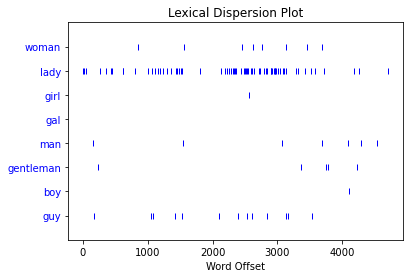

In [37]:
text8.dispersion_plot(
    ["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy" ]
                     )

Cada linha azul vertical representa uma instância de uma palavra. Cada linha horizontal de linhas azuis representa o corpus como um todo. Este gráfico mostra que:

* "lady" foi usado muito mais do que "woman" ou "girl". Não houve casos de "gal".
* "man" e "guy" foram usados um número semelhante de vezes e foram mais comuns do que "gentleman" ou "boy".

Você usa um gráfico de dispersão quando deseja ver onde as palavras aparecem em um texto ou corpus. Se você estiver analisando um único texto, isso pode ajudá-lo a ver quais palavras aparecem próximas umas das outras. Se você estiver analisando um corpus de textos organizado cronologicamente, isso pode ajudá-lo a ver quais palavras foram usadas mais ou menos durante um período de tempo.

Continuando no tema do romance, veja o que você pode descobrir fazendo um enredo de dispersão para Razão e Sensibilidade, que é o text2. Os romances de Jane Austen falam muito sobre as casas das pessoas, então faça um gráfico de dispersão com os nomes de algumas casas:

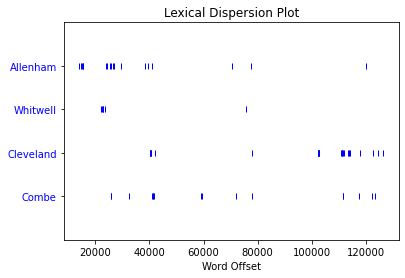

In [38]:
text2.dispersion_plot(["Allenham", "Whitwell", "Cleveland", "Combe"])

Aparentemente Allenham é muito mencionado no primeiro terço do romance e depois não aparece muito novamente. Cleveland, por outro lado, mal aparece nos dois primeiros terços, mas aparece bastante no último terço. Esta distribuição reflete mudanças na relação entre Marianne e Willoughby:

* Allenham é a casa da benfeitora de Willoughby e surge muito quando Marianne se interessa por ele.
* Cleveland é uma casa em que Marianne fica depois que ela vai ver Willoughby em Londres e as coisas dão errado.

Os gráficos de dispersão são apenas um tipo de visualização que você pode fazer para dados textuais. O próximo que você verá são as distribuições de frequência (algo como que um histograma).

## Fazendo uma distribuição de frequência de Palavras 

Com uma distribuição de frequência, você pode verificar quais palavras aparecem com mais frequência no seu texto. Perceba: 

In [39]:
from nltk import FreqDist

frequency_distribution = FreqDist(text8)
print(frequency_distribution) 

<FreqDist with 1108 samples and 4867 outcomes>


Como 1.108 amostras e 4.867 resultados são muitas informações, comece reduzindo isso. Veja como ver as 20 palavras mais comuns no corpus:

In [40]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('in', 27),
 ('slim', 27),
 ('build', 27),
 ('o', 26)]

Você tem muitas palavras de parada em sua distribuição de frequência, mas pode removê-las exatamente como fez anteriormente. Crie uma lista de todas as palavras em text8 que não são palavras de parada:

In [41]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

meaningful_words = [ 
    word for word in text8 if word.casefold() not in stop_words
]

frequency_distribution = FreqDist(meaningful_words) 
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('slim', 27),
 ('build', 27),
 ('smoker', 23),
 ('50', 23),
 ('non', 22),
 ('movies', 22),
 ('good', 21),
 ('honest', 20),
 ('dining', 19),
 ('rship', 18)]

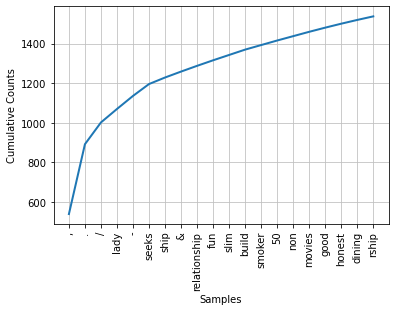

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [42]:
frequency_distribution.plot(20, cumulative=True)

Podemos também gerar uma WordCloud para ter o mesmo resultado mas num formato de visualização mais bonito (aqui, rodamos especificamente para as primeiras 60 palavras mais frequentes para termos um chart mais preenchido e interessante) - Em datasets mais amplos e com mais variação de discurso, geralmente as wordclouds ficam mais interessantes -. 

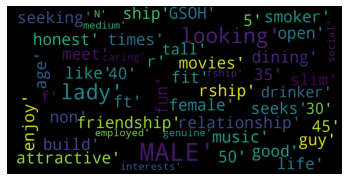

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=60,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(6, 6))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(frequency_distribution.most_common(60))

Algumas das palavras mais comuns são:

* 'lady'
* 'seeks'
* 'ship'
* 'relationship'
* 'fun'
* 'slim'
* 'build'
* 'smoker'
* '50'
* 'non'
* 'movies'
* 'good'
* 'honest'

Como visto antes, pessoas escrevendo esses anúncios pessoais pareciam interessados em honestidade e usavam muito a palavra 'lady'. Podemos também interpretar alguns detalhes a partir dessa pequena visualizaçào, como por exemplo 'slim' e 'build' aparecem o mesmo número de vezes. Você viu slim e build usados próximos um do outro quando estava aprendendo sobre concordâncias, então talvez essas duas palavras sejam comumente usadas juntas neste corpus. Isso nos leva às colocações! 

## Encontrando colocações

Uma colocação é uma sequência de palavras que aparece com frequência. Se você estiver interessado em colocações comuns em inglês, confira o [The BBI Dictionary of English Word Combinations](https://benjamins.com/catalog/z.bbi1(2nd)#:~:text=The%20BBI%20Dictionary%20of%20English%20Word%20Combinations%20tells%20you%20which,between%20American%20and%20British%20English.). É uma referência útil que você pode usar para ajudá-lo a garantir que sua escrita seja idiomática. Aqui estão alguns exemplos de colocações que usam a palavra “tree” em inglês:

* "Syntax tree"
* "Family tree"
* "Decision tree"

Para ver pares de palavras que aparecem com frequência em seu corpus, você precisa chamar .collocations() nele:

In [45]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


"slim build" apareceu, assim como "medium build" e várias outras combinações de palavras. 

Mas o que aconteceria se você procurasse por colocações depois de lematizar as palavras em seu corpus? Você encontraria algumas combinações de palavras que você perdeu na primeira vez porque elas surgiram em versões ligeiramente variadas?

Se você seguiu as instruções anteriores, já terá um lematizador, mas não poderá chamar collocations() em qualquer tipo de dados, então precisará fazer algum trabalho de preparação. Precisamos criar uma lista das versões lematizadas de todas as palavras em text8:

In [46]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in text8]

#transfromando texto para formato nltk que da pra usar nas funções que vimos
new_text = nltk.Text(lemmatized_words)
new_text.collocations()

medium build; social drinker; non smoker; quiet night; long term;
would like; age open; easy going; financially secure; Would like; fun
time; similar interest; Age open; weekend away; well presented; never
married; single mum; permanent relationship; year old; slim build


Em comparação com a lista anterior de colocações, esta nova está faltando algumas:

* weekends away
* poss rship

A ideia de `quiet nights` ainda aparece na versão lematizada, `quiet night`. Sua última busca por colocações também trouxe algumas novidades:

* **year old** sugere que os usuários muitas vezes mencionam idades.
* **photo pls** sugere que os usuários geralmente solicitem uma ou mais fotos.

É assim que você pode encontrar combinações de palavras comuns para ver o que as pessoas estão falando e como estão falando sobre isso.